In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
""" Problem 1 """

people = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
s1 = pd.Series(people)

val = -3
n = 5
s2 = pd.Series(val, index = 2 * (np.arange(n) +1))

print(s1)
print(s2)

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64
2    -3
4    -3
6    -3
8    -3
10   -3
dtype: int64


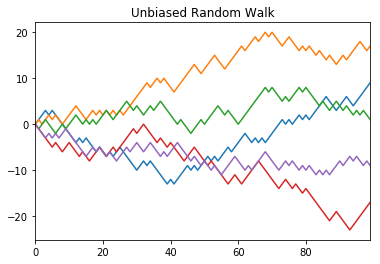

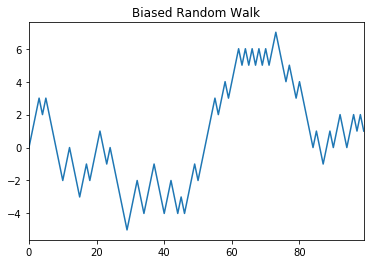

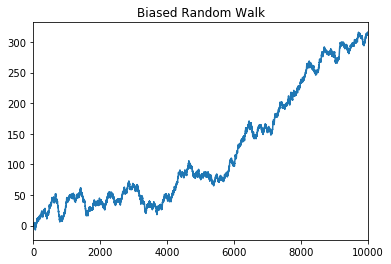

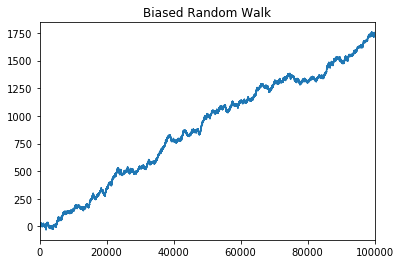

In [4]:
""" Problem 2 """

def get_walk(N,p):
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, p, size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    s.plot()
    
def plot_walk(N, p, n = None):
    if n != None:
        for i in range(n):
            get_walk(N,p)
    else:
        get_walk(N,p)
    if p == 0.5:
        plt.title("Unbiased Random Walk")
    else:
        plt.title("Biased Random Walk")
    plt.show()
    


plot_walk(100, 0.5, 5)
plot_walk(100, 0.51)
plot_walk(10000, 0.51)
plot_walk(100000, 0.51)

In [5]:
""" Problem 3 """
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

male19 = studentInfo[(studentInfo['Age'] > 19)&(studentInfo['Sex'] == 'M')].loc[:,['ID', 'Name']]
male19.head()

,ID,Name
0,0,Mylan
6,6,Matt


In [6]:
""" Problem 4 """
merged = pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex'] == 'M'].loc[:,['ID', 'Age', 'GPA']]
merged.head()

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


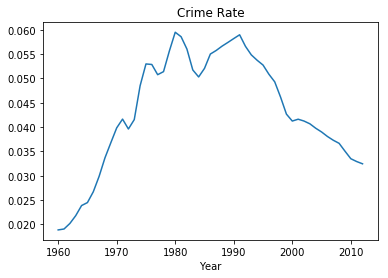

    Year      Rate
20  1980  0.059500
31  1991  0.058978
21  1981  0.058582
30  1990  0.058203
29  1989  0.057410
Total       1.063807e+07
Burglary    2.446286e+06
dtype: float64
    Year     Total  Burglary
13  1973   8718100   2565500
14  1974  10253400   3039200


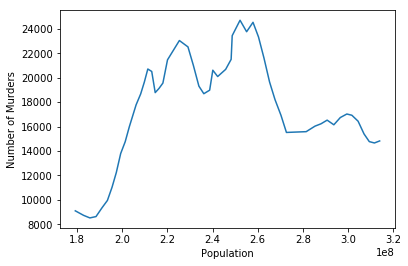

In [11]:
""" Problem 5 """
df = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/crime_data.txt", skiprows=1, header=0)
df["Rate"] = df["Total"] / df["Population"]

#Plot Crime Rate
plt.plot(df["Year"],df["Rate"])
plt.title("Crime Rate")
plt.xlabel("Year")
plt.show()

#Top 5 years with highest crime
print(df.nlargest(5,'Rate')[['Year','Rate']])

#Average Total Crimes
print(df[['Total', 'Burglary']].mean(axis=0))

#Total Crimes below, Burgaliers above 
print(df[(df["Total"] < df["Total"].mean()) & (df["Burglary"] > df["Burglary"].mean())][["Year","Total","Burglary"]])

#Plot murder as function of population
plt.plot(df["Population"],df["Murder"])
plt.xlabel("Population")
plt.ylabel("Number of Murders")
plt.show()

#Save to CSV
df[(df['Year'] > 1979) & (df['Year'] < 1990)].loc[:,["Population","Violent","Robbery"]].to_csv("crime_subset.txt")